In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

#### Exploratory data analysis


In [29]:
plt.style.use('default')
pd.options.display.float_format = "{:.2f}".format
pd.options.mode.chained_assignment = None
sns.set_theme(style="whitegrid")

In [30]:
df_record = pd.read_csv('./records.csv')
df_record.head()


,Name,Avg Rating,Avg Difficulty
0,Michael Ward,4.50,3.60
1,George Tsiknis,4.00,2.40
2,Kellogg Booth,2.00,3.80
3,Murray Goldberg,4.10,2.90
4,Dale Peterson,1.80,4.10


In [31]:
# summary statistics of ratings and difficulty of all profs
df_record[["Avg Rating", "Avg Difficulty"]].describe()

,Avg Rating,Avg Difficulty
count,96.00,96.00
mean,3.50,3.15
std,0.77,0.54
min,1.60,1.30
25%,2.90,2.70
50%,3.60,3.20
75%,4.10,3.50
max,4.90,4.50


Text(0, 0.5, 'Student rating')

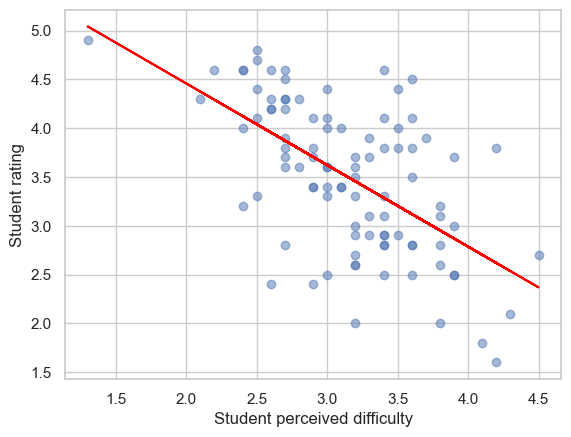

In [32]:
from sklearn.linear_model import LinearRegression
difficulty = df_record.iloc[:, -1].values
rating = df_record.iloc[:, 1].values
lr = LinearRegression()
lr.fit(difficulty.reshape(-1, 1), rating)

plt.scatter(difficulty, rating, alpha=0.5)
plt.plot(difficulty, lr.predict(difficulty.reshape(-1,1)), color = "red")
plt.xlabel("Student perceived difficulty")
plt.ylabel("Student rating")

In [33]:
df_comment = pd.read_csv('./comments.csv')
print(df_comment.to_string(max_rows=10, max_colwidth=50))

               Prof Name  Quality  Difficulty Grade                                            Comment
0          Michael Ward      4.00        3.00    A+  Great dad joke style lecture! He cares about h...
1          Michael Ward      5.00        4.00    A-  One of the most charismatic professors I had f...
2          Michael Ward      5.00        3.00    A+  Fantastic professor. He explains everything cl...
3          Michael Ward      5.00        2.00   NaN  I really cannot understand the people here com...
4          Michael Ward      5.00        3.00   NaN  This prof is the best prof Ive ever met! So go...
...                  ...      ...         ...   ...                                                ...
1793  George Digiovanni      4.50        2.00    B+  Lectures to the heart of philosophy giving his...
1794  George Digiovanni      2.00        3.00   NaN  He might know philosophy, but he not sharing i...
1795  George Digiovanni      3.50        3.00   NaN  This guy is brillian

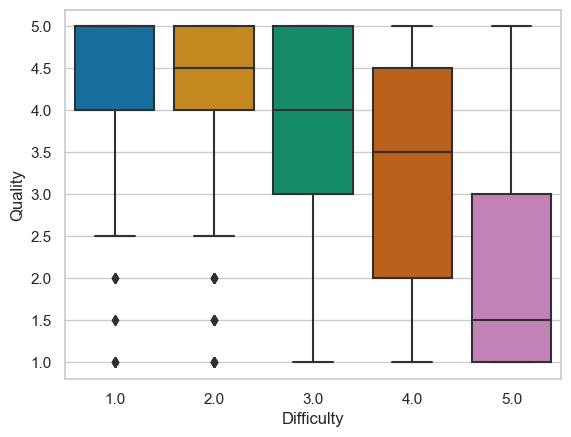

In [34]:
ax = sns.boxplot(y='Quality', x='Difficulty',
                 data=df_comment, palette='colorblind')
# df_comment[["Quality", "Difficulty"]].describe()


<AxesSubplot:xlabel='Grade', ylabel='Count'>

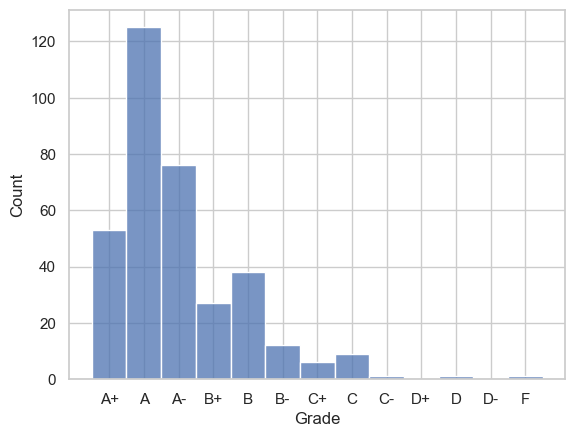

In [35]:
df_withGrade = df_comment[df_comment['Grade'].notna()]
df_withGrade['Grade'] = pd.Categorical(
    df_withGrade['Grade'],
    categories=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
    ordered=True)

sns.histplot(data=df_withGrade, x='Grade')

In [36]:
group = ['A+', 'A', 'A-', 'B+ to F']
df_withGrade['grade_group'] = np.select(
    [   df_withGrade['Grade'].isin(['A+']),
        df_withGrade['Grade'].isin(['A']),
        df_withGrade['Grade'].isin(['A-']),
        df_withGrade['Grade'].isin(['B+','B','B-','C+','C','C-','D+','D','D-','F'])
    ], group
)

Text(0.5, 1.0, 'Grade distribution')

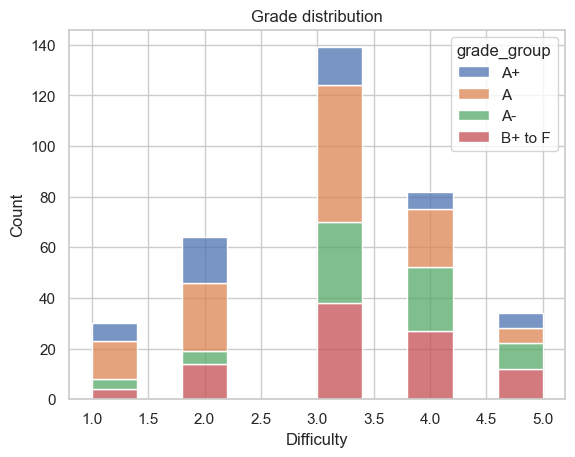

In [37]:
ax = sns.histplot(data=df_withGrade, x='Difficulty', hue='grade_group',
             hue_order=group, multiple='stack')
ax.set_title("Grade distribution")

Text(0.5, 0.98, 'Histogram of student rating (Quality) from each grade group')

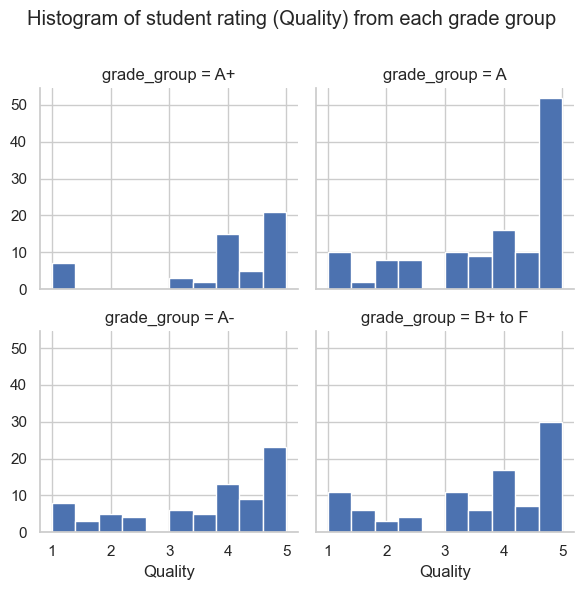

In [38]:
grid = sns.FacetGrid(df_withGrade, col='grade_group', col_wrap=2, col_order=group)
grid.map(plt.hist, 'Quality')
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle('Histogram of student rating (Quality) from each grade group')

In [39]:
# clean the comment data
import re
import string

def clean_text(text):
    # Make text lowercase, remove punctuation, words containing numbers, and nonsensical text.
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df_clean = pd.DataFrame(df_comment['Comment'].apply(clean))
df_clean

,Comment
0,great dad joke style lecture he cares about hi...
1,one of the most charismatic professors i had f...
2,fantastic professor he explains everything cle...
3,i really cannot understand the people here com...
4,this prof is the best prof ive ever met so goo...
...,...
1793,lectures to the heart of philosophy giving his...
1794,he might know philosophy but he not sharing it...
1795,this guy is brilliant and hilarious loved his...
1796,george digiovanni understands hegel which mean...


In [49]:
# tokenize comments
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
data_cv = cv.fit_transform(df_comment['Comment'])

# Document-Term Matrix
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_comment.index

,_,___,____,ability,able,abrasive,absent,absolute,absolutely,absolutly,...,youtube,yr,yrs,yu,yup,zero,zombor,zone,zorbas,zybook
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
